# Plot the data from the json

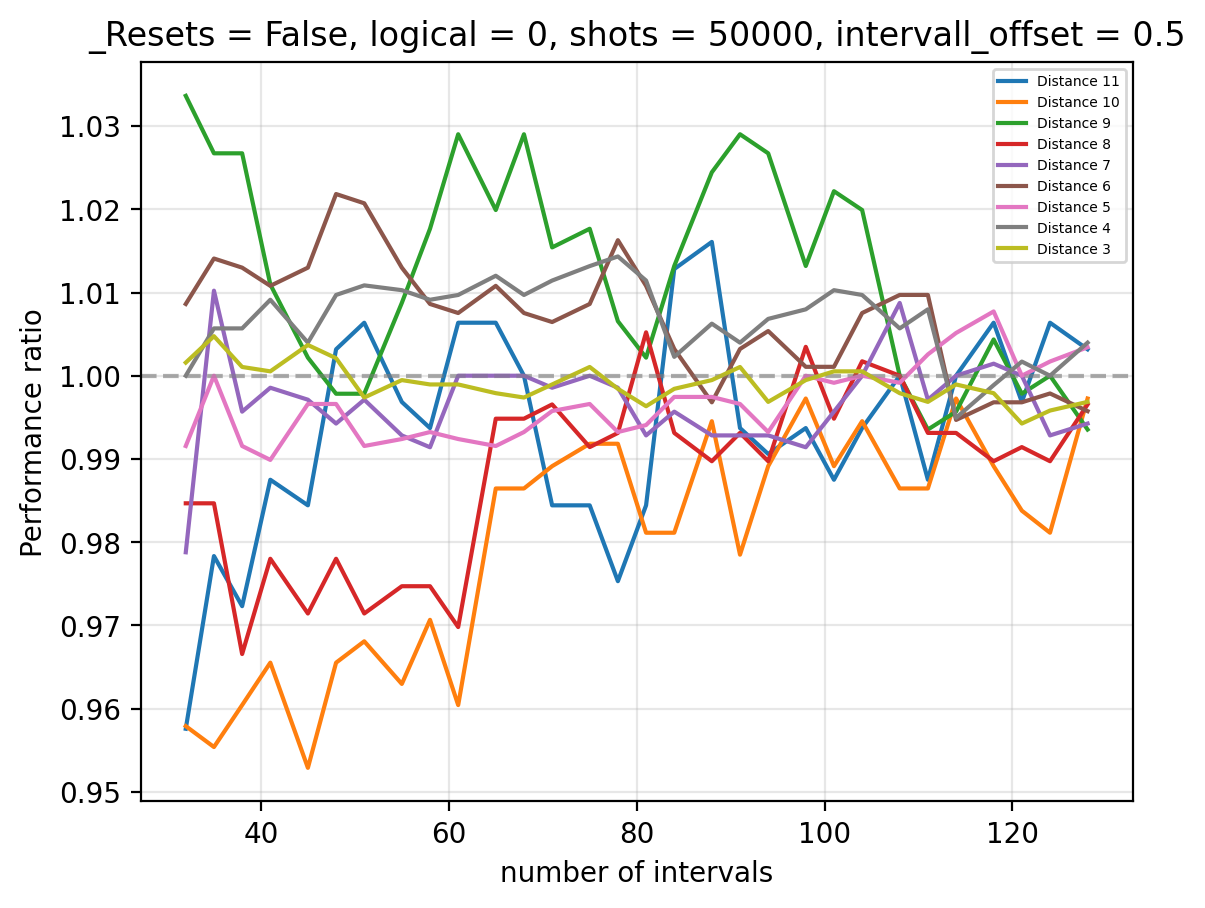

In [35]:
import matplotlib.pyplot as plt 
import json
import numpy as np

with open(f"result_tradeoff_grid_intervals.json", "r") as f:
    data = json.load(f)

plt.figure(dpi=200)
for result in data:
    if result["metadata"]["DISTANCE"] != result["metadata"]["ROUNDS"]:
        continue
    if result["metadata"]["_RESETS"] != False:
        continue
    # if result["metadata"]["SHOTS"] != int(2e5):
    #     continue
    if "interval_offset" not in result["metadata"].keys():
        continue

    if result["metadata"]["interval_offset"] != 0.5:
        continue
    
    if result["metadata"]["DISTANCE"] > 11:
        continue

    # if result["metadata"]["DISTANCE"] %2 == 0:
    #     continue

    
    errors = [result["num_errors"][-1]/(e+1e-8) for e in result["num_errors"][:-1]]
    bits = [2**b for b in result["bits"][:-1]]
    bits = result["bits"][:-1]
    plt.plot(np.linspace(2**5, 2**7, 30).astype(int), errors[:], label=f"Distance {result['metadata']['DISTANCE']}")
    plt.title(f"_Resets = {result['metadata']['_RESETS']}, logical = {result['metadata']['LOGICAL']}, shots = {result['metadata']['SHOTS']}, intervall_offset = {result['metadata']['interval_offset']}")
    plt.xlabel("Number of bits (2**bits intervals)")
    plt.xlabel("number of intervals")
    plt.xticks()
    plt.ylabel("Performance ratio")
    # plt.ylim(0.6, 1.1)
    # plt.xticks(bits)
    plt.axhline(y=1, color='grey', linestyle='--', alpha=0.1)
    plt.legend(fontsize=5)
    plt.grid(alpha=0.3)
